<font color="">**Introduction to PyTorch**</font>  
<font color="">**Logistic Regression Model**</font>  
<u>**Lecturer**</u>: <font color="DeepSkyBlue">*Khiem Nguyen*</font> -- *James Watt School of Engeering - University of Glasgow*

# Logistic regression

In this notebook, we shall revisit logistic regression for binary classification and multi-class classification problems. Particularly, we will implement the logistic regression models using PyTorch. We shall study three classification problems varying in difficulty level.

1. Binary classification for data points in 2D plane.
2. Binary classification for Electrocardio diagram (ECG) data.
3. Classifying digits from $0$ to $9$ in image format.

## Logistic regression for binary classification

In statistics, the logistic model (or logit model) is a statistical model that models the *log-odds* of an event as a linear combination of one or more independent variables. In *regression analysis*, logistic regression (or **logit regression**) estimates the parameters of a logistic model (the coefficients in the linear combinations). In binary logistic regression there is a single binary dependent variable, coded by an indicator variable, where the two values are labelled "0" and "1", while the independent variables can each be a discrete variable (taking values in a finite set of values) or a continuous variable (any real value).

### Terminology
Given a dataset $\mathrm{D} = \{(\mathbf{x}^{(1)}, y^{(1)}), \ldots (\mathbf{x}^{m}, y^{m})\}$ in which $\mathbf{x}^{(i)} = (x_{1}^{(i)}, \ldots x_{n}^{(i)})$ is one particular independent variable and $y^{(i)}$ is its corresponding dependent variable. The dataset has $m$ examples, the input data $\mathbf{x}^{(i)}$ has $n$ features and the label $y^{(i)}$ takes value either "$0$" or "$1$".

### Formulation
The logistic regression model combines a linear layer with the sigmoid activation function. The probability that a given example $\mathbf{x}$ is of class $1$ is modeled by
$$
P(y = 1|\mathbf{x}) = \sigma(\mathbf{w} \cdot \mathbf{x} + b) = \frac{1}{1 + \exp(-(\mathbf{w} \cdot \mathbf{x} + b) )},\tag{$\ast$}
$$
where the weights $\mathbf{w} = (w_1, \ldots, w_n)$ and the bias $b$ of the model are the learnable parameters that must be sought by optimizing a loss function measuring how well the model makes prediction. It is clear that the logistic regression model in ($\ast$) can be classified as a linear model as the core of the model is still the linear combination $z = \mathbf{w} \cdot \mathbf{x} + b$.

Our goal is to find the model parameters $\mathbf{w}$ and $b$ so that the model can make prediction on the given dataset as well as possible and hope that it can make good prediction on a dataset the model has not seen before. To this end, we define the negative log loss function that penalize the wrong prediction by increasing the loss value and reward the correct prediction by decreasting the loss value. By denoting 
$$
p(\mathbf{x}) = P(y = 1|\mathbf{x}) = \frac{1}{1 + \exp(-(\mathbf{w} \cdot \mathbf{x} + b))}
$$
$$
\mathcal{L} = -\sum\limits_{i=1}^{m} \big[ y^{(i)} \log (p(\mathbf{x}^{(i)})) + (1 - y^{(i)}) \log(1 - p({\mathbf{x}^{(i)}}) )\big].
$$
Then, then final prediction $\widehat{y}^{(i)}$ takes the value $1$ if $p(\mathbf{x}^{(i)}) \geq 0.5$ and value $0$ if $p(\mathbf{x}^{(i)}) < 0.5$.
The derivatives of the loss function with respect to the model parameters are easily computed and they are given by
$$
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial w_j} &= \frac{1}{m}\sum\limits_{i=1}^{n} [p(\mathbf{x}^{(i)}) - y^{(i)}] x_{j}^{(i)} \\
\frac{\partial \mathcal{L}}{\partial b} &= \frac{1}{m}\sum\limits_{i=1}^{n} [p(\mathbf{x}^{(i)}) - y^{(i)} ]
\end{aligned}
$$

We will not implement the gradient of the loss function $\nabla\mathcal{L}$ using the formula above. The computation of this gradient can be easily done in PyTorch by calling the function `backward()` on the tensor definining the loss function. 

## Binary classification for data points in 2D plane

In this first example, we will generate a dataset of two-dimensional data points and assign them the true labels using an ellipse boundary decision. A standard ellipse centered at the origin with the width $2a$ and height $2b$ is described by equation
$$\frac{x^2}{r_1^2} + \frac{y^2}{r_2^2} = 1.$$
The ellipse can be parameterized according to
$$\left\{\begin{aligned}
x(t) &= r_1 \cos(t) \\[6pt]
y(t) &= r_2 \sin(t) \end{aligned}\right. \quad \forall t \in [0, 2\pi).$$

Indeed, we can easily see 
$$\begin{equation*}
\frac{x(t)^2}{a^2} + \frac{y(t)^2}{b^2} = 1.
\end{equation*}$$

What we want to do now is to assign the data points inside the ellipse the label $1$ and outside the ellipse the label $0$. To make the problem more complex, we shall rotate translate and then rotate the ellipse by a vector $\mathbf{c}$ and an angle $\theta$, respectively. The equation describing this ellipse is given by
$$
\begin{equation*}
E(x_1, x_2) = \frac{\big[(x_1 - c_1) \cos(\theta) + (x_2 - c_2) \sin(\theta) \big]^2}{r_1^2} + \frac{\big[(x_1 - c_1) \sin(\theta) - (x_2 - c_2)\cos(\theta) \big]^2}{r_2^2} = 1
\end{equation*}
$$
The two-dimensional points inside the ellipse are characterized by the inequality $E(x_1, x_2) \leq 1$ and the data points outside the ellipse by $E(x_1, x_2) > 1$. 

When $\theta$, $\mathbf{c} = (c_1, c_2)$ and the axes $r_1$, $r_2$ are viewed as fixed, no matter how complicated the expression $E(x_1, x_2)$ is, it is just a quadratic function of $x_1$ and $x_2$. If we use the logistic regression with second-order polynomial features in terms of $x_1$ and $x_2$, it is reasonable to expect that the decision boundary resulted from the logistic regression model closely fit the ellipse we used to classify the data points. Assume that we use features $x_1$, $x_2$, $x_1 x_2$, $x_1^2$ and $x_2^2$, the decision boundary is described by
$$
\mathcal{B}(x_1, x_2) := w_{10} x_1 x_2^{0} + w_{01} x_1^{0} x_2 + w_{11} x_1^2 + w_{12} x_1 x_2 + w_{22} x_2^2 + b = 0,
$$
where $w_{ij}$ and $b$ are the weights of the logistic regression model.

**Remark**

In theory, we know for sure that there must be an ellipse that perfectly classifiy the data generated as described above because our data have been classified using that "perfect" ellipse. This is the example of the data can can be perfectly separated in a high-dimensional space using feature mapping $$\Phi: (x_1, x_2) \mapsto \Phi(x_1, x_2) = (x_1, x_2, x_1^2, x_1 x_2, x_2^2).$$ In the $5$-dimensional space, the dataset $\mathrm{D} = \Big\{(x_1^{(i)}, x_2^{(i)}, x_1^{(i)2}, x_1^{(i)} x_2^{(i)}, x_2^{(i)2})\Big\}_{i=1}^{m}$ are perfectly seperated by a hyperplane. A hyperplane is just like a linear straight line in $2D$ space and a linear plane in $3D$ space. I add the prefix "hyper" to mean that we can plot it. The prefix "hyper" can imply various meanings in different mathematical context. But we should not worry about this in this course. We shall discuss the consequence of this observation after training the model.

In [1]:
# First thing first, import all the necessary packages

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from tqdm import tqdm
import torch.nn.functional as F

### Generate data

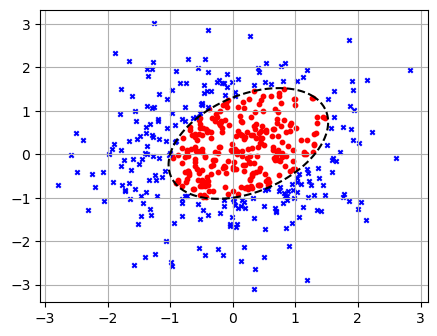

In [2]:
torch.manual_seed(seed=42)
X = torch.randn(size=(500, 2))
c = torch.tensor([0.25, 0.25])
r = torch.tensor([1.5, 1])
theta = torch.tensor(torch.pi/4)

a = (X[:,0] - c[0]) * torch.cos(theta) + (X[:,1] - c[1]) * torch.sin(theta)
b = (X[:,0] - c[0]) * torch.sin(theta) - (X[:,1] - c[1]) * torch.cos(theta)
mask = a**2 / r[0]**2 + b**2 / r[1]**2 <= 1
y = torch.zeros(size=(X.shape[0],), dtype=torch.float32)
y[mask] = 1.0

n_samples, n_features = X.shape
t = torch.linspace(0, 2*torch.pi, 100)
xx = c[0] + r[0] * torch.cos(t) * torch.cos(theta) - r[1] * torch.sin(t) * torch.sin(theta)
yy = c[1] + r[0] * torch.cos(t) * torch.sin(theta) + r[1] * torch.sin(t) * torch.cos(theta)

# Visualization
plt.figure(figsize=(5, 3.8))
plt.scatter(X[mask,0], X[mask,1], marker='o', color='r', s=10)
plt.scatter(X[~mask,0], X[~mask,1], marker='x', color='b', s=10)
plt.plot(xx, yy, 'k--')
plt.grid(True); plt.show()

### Build the logistic regression model and train the model

The following are the steps to perform
1. Construct the second-order polynomial features from the "linear" features $x_1$ and $x_2$.
2. Define the logistic regression model as the subclass of `nn.Module`.
3. Define the loss function, optimizer for the training process.
4. Train the model: run the optimization algorithm

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly = torch.from_numpy(X_poly.astype(np.float32))

print(f"X_poly.shape = {X_poly.shape}")

X_poly.shape = torch.Size([500, 5])


As we have learned, the logistic model is defined by a linear regression layer before the sigmoid activation $
p = \sigma\big(\sum\limits_{i=1}^{n} w_{i} x_{i} + b\big) = \sigma(\mathbf{w} \cdot \mathbf{x} + b).$ The value $p$ represents the probability that the data point $\mathbf{x}$ is of class $1$, that is
$
p = P(y = 1 | \mathbf{x}).
$
Then, the prediction is made by using the probability $p$ and the threshold $50\%$ as follows

$\widehat{y} = \begin{cases} 1 &\quad p \geq 0.5 \\
0 & \quad p < 0.5
\end{cases}
$

In [4]:
class LogisticRegression(nn.Module):
    def __init__(self,n_features):
        super().__init__()
        self.n_classes = 2
        self.lin = nn.Linear(in_features=n_features, out_features=1)

    def forward(self, x):
        x = self.lin(x)
        x = nn.functional.sigmoid(x)
        return x.flatten()
    
model = LogisticRegression(n_features=X_poly.shape[1])
print(f"model = \n{model}")

model = 
LogisticRegression(
  (lin): Linear(in_features=5, out_features=1, bias=True)
)


Let us test whether our model works the way we expect. We create a dataset of $4$ random data points, each data point has the $5$ features. This dataset, represented as a torch tensor of size $(20 ,5)$ is fed into the model. As the output has only $1$ feature and then flattened, we expect the output is just a one-dimensional vector of $20$ elements, where the number $20$ is for number of data points.

In [10]:
X_rand = torch.rand(20, X_poly.shape[1])
y_pred = model(X_rand)
print(f"y_pred.shape = {y_pred.shape}")

y_pred.shape = torch.Size([20])


Now we train the model and print out the loss values in each of $10$ major steps. The meanings of the variable are mostly self-explained by the variable names.

In [6]:
EPOCHS = int(5e3)
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
n_prints = 10
print_every = int(EPOCHS/n_prints)
for epoch in range(EPOCHS):
    # zero out the gradients
    optimizer.zero_grad()
    # forward pass
    y_prob = model(X_poly)
    loss = criterion(y_prob, y)
    if (epoch % print_every == print_every - 1) or (epoch == EPOCHS-1) or (epoch == 0):
        print(f"Epoch [{epoch+1} / {EPOCHS}]: loss = {loss.item():6.5f}")
    # backward pass
    loss.backward()
    optimizer.step()

Epoch [1 / 5000]: loss = 0.72338
Epoch [500 / 5000]: loss = 0.04660
Epoch [1000 / 5000]: loss = 0.03079
Epoch [1500 / 5000]: loss = 0.02357
Epoch [2000 / 5000]: loss = 0.01919
Epoch [2500 / 5000]: loss = 0.01616
Epoch [3000 / 5000]: loss = 0.01393
Epoch [3500 / 5000]: loss = 0.01220
Epoch [4000 / 5000]: loss = 0.01081
Epoch [4500 / 5000]: loss = 0.00968
Epoch [5000 / 5000]: loss = 0.00872


Now, we make the prediction according to 

$\widehat{y} = \begin{cases} 1 &\quad p \geq 0.5 \\
0 & \quad p < 0.5
\end{cases}
$

In [7]:
y_pred = torch.zeros_like(y_prob)
y_pred[y_prob >= 0.5] = 1
accuracy_score = torch.sum(y_pred == y) / n_samples
print(f"accuracy score = {accuracy_score:5.4f}")

accuracy score = 0.9980


**Discussion of the accuracy**

As explained in the paragraph **remark**, we expect to see the perfect accuracy score $100\%$. If you don't see the perfect score $100\%$ it just means the accuracy score can be improved by training the model with more. I deliberately use rather small learning rate $\alpha = 0.1$ to demonstrate this point. If you execute the code cell for training the model again, keeping the learning rate, you will see that the loss function will continue to decrease. This is because the learnable parameters in the model (the weight and the bias of the linear layer) keep updating themselves. Alternatively, we can retrain the model from scratch but with larger learning rate or with many training epochs. Ultimately, you should see the classification accuracy of $100\%$ .

In [8]:
# Detach the weights and the bias and save them into other variables.
w, b = model.lin.weight.detach().numpy().flatten(), model.lin.bias.detach().numpy()
print(f"w = {w}")
print(f"b = {b}")

w = [ 10.55171   11.238878 -35.644676  29.200615 -34.509052]
b = [45.63771]


The decision boundary is given by the condition $p = \sigma(\mathbf{w} \cdot \mathbf{x} + b) = 0.5$, or equivalently $\mathbf{w} \cdot \mathbf{x} + b = 0$, where $\mathbf{x} = (x_1, x_2, x_1^{2}, x_1 x_2, x_2^2)$. We obtained the weights $\mathbf{w}$ and the bias $b$ from the model. Now, we can plot the ellipse defined before and the decision boundary on top of the data. Hopefully, they look alike.

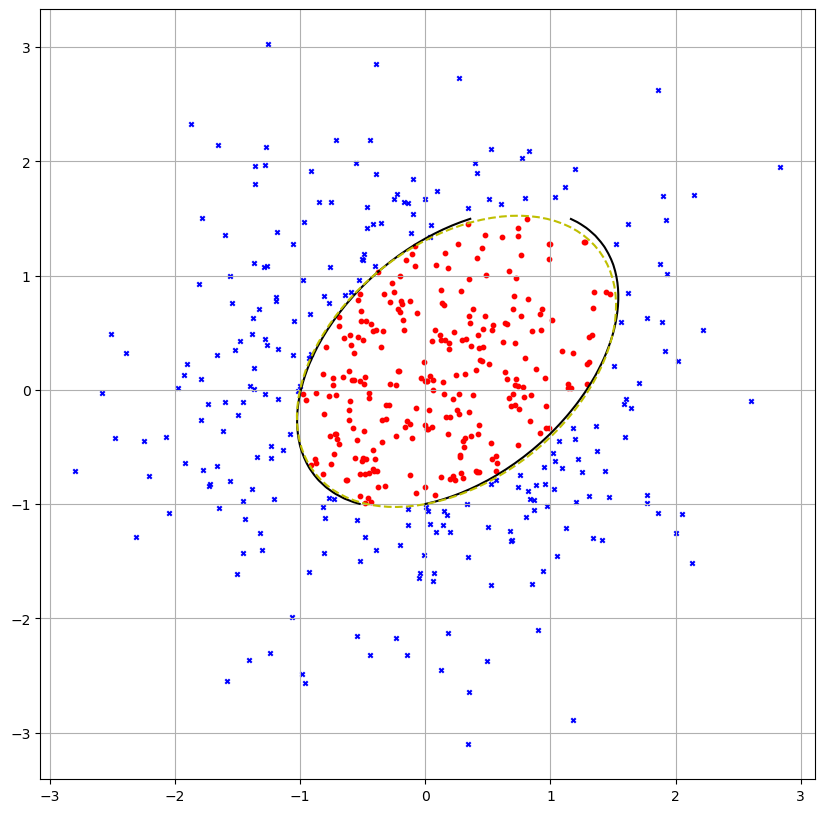

In [9]:
x1 = np.linspace(-1.5, 2, 50)
x2 = np.linspace(-1, 1.5, 50)
X1, X2 = np.meshgrid(x1, x2)
Z = w[0]*X1 + w[1]*X2 + w[2]*X1**2 + w[3]*X1*X2 + w[4]*X2**2 + b

t = torch.linspace(0, 2*torch.pi, 100)
t = torch.linspace(0, 2*torch.pi, 100)
xx = c[0] + r[0] * torch.cos(t) * torch.cos(theta) - r[1] * torch.sin(t) * torch.sin(theta)
yy = c[1] + r[0] * torch.cos(t) * torch.sin(theta) + r[1] * torch.sin(t) * torch.cos(theta)

# Visualization
plt.figure(figsize=(10, 10))
cs = plt.contour(X1, X2, Z, levels=[0], colors='k')
plt.scatter(X[mask,0], X[mask,1], marker='o', color='r', s=10)
plt.scatter(X[~mask,0], X[~mask,1], marker='x', color='b', s=10)
plt.plot(xx, yy, 'y--')
plt.grid(True); plt.show()

## Binary classification with ECG data

In this example, we revisit the problem in the first assignment in the course ENG4200. Particularly, we are given a set of electrocardiogram data with the label "normal" or "abnormal". Our task is to make prediction on a given ECG data whether it is normal or abnormal. This problem is easily solved by using the popular scikit-learn. Herein, we will use PyTorch to build a binary classification model. Those who already solved this problem by using scikit-learn can skip the part of reading and plot data.

### Read and explore data

In [10]:
data = np.loadtxt('./data/ecg/ecg.csv', delimiter=',')
X = torch.from_numpy(data[:,:-1].astype(np.float32))
y = torch.from_numpy(data[:,-1].astype(np.float32))
n_features = X.shape[1]
n_classes = len(torch.unique(y))
print(f"n_features = {n_features}")
print(f"n_classes = {n_classes}")

n_features = 140
n_classes = 2


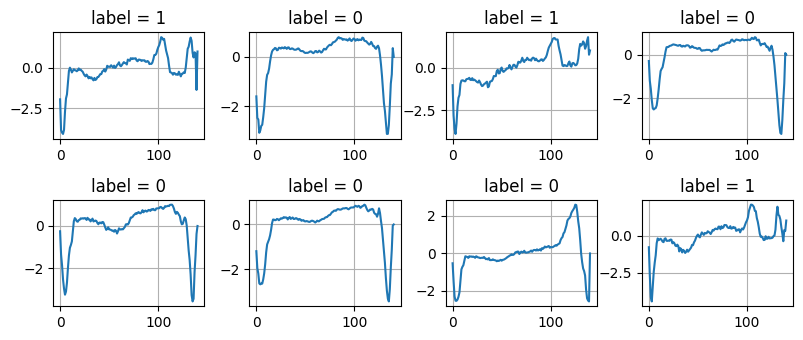

In [11]:
nrows, ncols = 2, 4
plt.figure(figsize=(8, 3.5))
np.random.seed(seed=42)         # just for reproducibility purpose
for i in range(nrows * ncols):
    plt.subplot(nrows, ncols, i+1)
    idx = np.random.randint(low=0, high=X.shape[0])
    plt.plot(data[idx])
    plt.title(f"label = {int(y[idx])}")
    plt.grid(True)
    
plt.tight_layout()

Now, we split the dataset into the training set and the test set. There are two ways to complete this task:
1. We can read the data into Numpy array and then use the utility function `train_test_split()` from scikit-learn to split the data. The splitted data, which is stored in Numpy array, must be converted to torch tensor.
2. We can split the data using the function `random_split()` from the submodule `torch.utils.data`. In this manner, the data is stored and processed in the torch tensor format.

First, we create the dataset by using the class `TensorDataset` from the module `torch.utils.data`. It is a tensor dataset wrapper.

In [12]:
dataset = torch.utils.data.TensorDataset(X, y)

One single data point in the dataset is retrieved by indexing. One data point is a tuple $(X, y)$, where $X$ is the input and $y$ is the label.


In [13]:
# Let us look at one data point in the dataset
idx = np.random.randint(low=0, high=len(dataset))
print(f"dataset[idx]\n= {dataset[idx]}",end="\n\n")
print(f"dataset[idx][0].shape = {dataset[idx][0].shape}")
print(f"dataset[idx][1].shape = {dataset[idx][1]}")

dataset[idx]
= (tensor([ 2.5642e+00,  1.6133e+00, -1.0952e+00, -2.5033e+00, -3.9411e+00,
        -4.1120e+00, -3.0459e+00, -1.8263e+00, -1.4754e+00, -8.7202e-01,
         1.1603e-01,  2.0517e-01,  2.1609e-01,  2.9636e-02,  1.3780e-01,
        -8.0807e-02, -2.6974e-02,  3.0211e-02,  1.9038e-02, -1.1212e-02,
        -1.4642e-01, -1.8697e-01, -1.5845e-01, -4.0963e-01, -3.6153e-01,
        -4.3240e-01, -4.5967e-01, -5.3925e-01, -6.3494e-01, -7.5498e-01,
        -5.9881e-01, -8.4077e-01, -8.0720e-01, -1.0288e+00, -1.0540e+00,
        -9.2218e-01, -1.0940e+00, -1.0430e+00, -1.0946e+00, -9.6369e-01,
        -1.0870e+00, -9.2030e-01, -7.7628e-01, -6.4401e-01, -5.2604e-01,
        -4.2133e-01, -3.0396e-01, -2.5825e-01, -2.5265e-01,  1.8364e-03,
        -5.1622e-02, -2.1419e-02, -4.5144e-02,  9.0091e-02,  5.4400e-02,
         9.1885e-02,  2.0298e-01,  1.7631e-01,  1.7145e-01,  2.5727e-01,
         3.5981e-01,  8.4684e-02,  2.4584e-01,  2.6225e-01,  3.0864e-01,
         3.5172e-01,  3.6711e-01,  

In [14]:
# Now we split the dataset by the proportion 80% - 20%.
generator = torch.Generator().manual_seed(42)
train_set, test_set = torch.utils.data.random_split(dataset, [0.8, 0.2], generator=generator)

print(f"train_set = {train_set}")
print(f"test_set = {test_set}")

train_set = <torch.utils.data.dataset.Subset object at 0x000001ED61FB2360>
test_set = <torch.utils.data.dataset.Subset object at 0x000001ED61FB2C60>


We can see that `train_set` and `test_set` are just two `Subset` objects. These are considered as subsets of the dataset defined by the variable `dataset`.

### Loading data by using `Dataloader`

Data loader combines a dataset and a sampler, and provides an iterable over the given dataset. The `DataLoader` supports both map-style and iterable-style datasets with single- or multi-process loading, customizing loading order and optional automatic batching (collation) and memory pinning.

By using data loader, we can load the dataset batch by batch. In this example, we shall determine a batch size of $64$ for one loading and shuffle the data for the training set and not for the test set.

In [15]:
train_dataloader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False)       # Most of the time we don't need to load the data in the test set.

# Let us see how they look like:
print(f"train_dataloader = {train_dataloader}")
print(f"valid_dataloader = {test_dataloader}")

train_dataloader = <torch.utils.data.dataloader.DataLoader object at 0x000001ED620062A0>
valid_dataloader = <torch.utils.data.dataloader.DataLoader object at 0x000001ED6338E9F0>


In [16]:
# Let us load one batch from the training set
train_dataloader_iter = iter(train_dataloader)  # Convert the dataloader into an iterator
batch = next(train_dataloader_iter)     # get the first element in the iterator. batch is returned as a list
print(f"type(batch) = {type(batch)}")
print(f"One particular batch:\n{batch}", end="\n\n")
print(f"len(batch) = {len(batch)}")

type(batch) = <class 'list'>
One particular batch:
[tensor([[-0.9620, -2.6475, -3.3332,  ...,  0.8492,  1.0376, -0.2439],
        [-1.6465, -3.7381, -3.7428,  ..., -0.3527, -1.1191, -3.9637],
        [-0.6441, -1.6387, -2.8377,  ..., -0.2392, -0.1628, -1.1788],
        ...,
        [-0.4507, -1.2641, -1.6547,  ..., -1.0748, -0.8081,  0.0897],
        [-1.4953, -3.2180, -3.8799,  ...,  1.0988,  0.7059, -1.1961],
        [-0.2527, -1.4792, -2.2944,  ..., -2.9581, -2.0316, -1.0822]]), tensor([1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
        1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
        1., 1., 1., 0., 1., 1., 0., 0., 1., 0.])]

len(batch) = 2


As you can see, `batch` is just a list of two elements. The first element contains the input data and the second element contains the label data.

In [17]:
X_batch, y_batch = batch
print(f"X_batch.shape = {X_batch.shape}")
print(f"y_batch.shape = {y_batch.shape}")

X_batch.shape = torch.Size([64, 140])
y_batch.shape = torch.Size([64])


### Build the logistic regression model and train the model

There is no change as compared the last problem.

In [18]:
class LogisticRegression(nn.Module):
    def __init__(self,n_features):
        super().__init__()
        self.n_classes = 2
        self.lin = nn.Linear(in_features=n_features, out_features=1)

    def forward(self, x):
        x = self.lin(x)
        x = nn.functional.sigmoid(x)
        return x.flatten()
    
model = LogisticRegression(n_features)

Let us test the model by feed one batch of input data into the model.

In [19]:
y_prob = model(X_batch)
print(f"y_pred.shape = {y_prob.shape}")

y_pred.shape = torch.Size([64])


Instead of using the binary classification error loss `nn.BCELoss()` as a wrapper to compute the loss function value for one batch of data, we can define the loss function by direct formulation.

In [20]:
# Compute loss function following the analytical formulation we learned in the lecture
loss_eqn = -torch.mean(y_batch * torch.log(model(X_batch)) +  (1 - y_batch) * torch.log(1 - model(X_batch)))

# 
criterion = nn.BCELoss()
loss = criterion(model(X_batch), y_batch)

print(f"loss_eqn = {loss_eqn.item()}")
print(f"loss     = {loss.item()}")
print(f"loss_eqn == loss: {torch.allclose(loss_eqn, loss)}")

loss_eqn = 0.7100945711135864
loss     = 0.7100945711135864
loss_eqn == loss: True


#### Train the model
Now, we can train the model. On top of that, we also compute the accuracy score of the prediction made on the training set. We use `tqdm` to produce the running bar. This is not necessary; it is just to make things look fancy and nice.

In [21]:
EPOCHS = 50
epoch_stamp = int(EPOCHS/4)
optimizer = torch.optim.Adam(model.parameters(), lr=0.2)
model.train()
for epoch in tqdm(range(EPOCHS)):
    total_loss = 0
    total_accuracy = 0
    for X_batch, y_batch in train_dataloader:
        # zero out the gradients
        optimizer.zero_grad()
        # forward pass
        y_prob = model(X_batch)
        loss = criterion(y_prob, y_batch)
        # backward pass
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        y_pred = torch.zeros_like(y_prob, dtype=torch.float32)
        y_pred[y_prob >= 0.5] = 1
        total_accuracy += torch.sum(y_pred == y_batch)
    
    accuracy_score = total_accuracy / len(train_set)
    if epoch % epoch_stamp == epoch_stamp - 1:
        print(f"epoch {epoch:>2d}:", end=" ")
        print(f"average total loss = {total_loss / len(train_dataloader):7.6f}")
        print(10 * " " + f"accuracy score     = {accuracy_score:6.5f}")

print("Final epoch:")
print(f"average total loss = {total_loss / len(train_dataloader):7.6f}")
print(f"accuracy score     = {accuracy_score:6.5f}")

 30%|███       | 15/50 [00:00<00:01, 18.94it/s]

epoch 11: average total loss = 0.475314
          accuracy score     = 0.98200


 50%|█████     | 25/50 [00:01<00:01, 18.81it/s]

epoch 23: average total loss = 0.241559
          accuracy score     = 0.98775


 76%|███████▌  | 38/50 [00:02<00:00, 18.72it/s]

epoch 35: average total loss = 0.664881
          accuracy score     = 0.98400


100%|██████████| 50/50 [00:02<00:00, 18.61it/s]

epoch 47: average total loss = 0.263680
          accuracy score     = 0.99000
Final epoch:
average total loss = 0.411715
accuracy score     = 0.98900


We now evaluate the accuracy score of the prediction made on the test set.

In [22]:
with torch.no_grad():
    model.eval()
    total_accuracy = 0
    for X_batch, y_batch in test_dataloader:
        y_prob = model(X_batch)     # compute the array of probabilites P(y = 1|batch)
        
        # make prediction
        y_pred = torch.zeros_like(y_prob, dtype=torch.float32)  
        y_pred[y_prob >= 0.5] = 1
        # count the number of correct predictions for one batch
        total_accuracy += torch.sum(y_pred == y_batch)

    # Of course the final accuracy score is the computed at the end.
    accuracy_score = total_accuracy / len(test_set)
    print(f"accuracy score = {accuracy_score}")

accuracy score = 0.9909909963607788


w.shape = (1, 140)


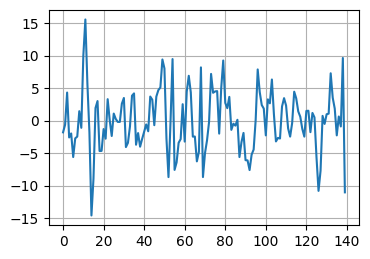

In [23]:
w = model.lin.weight.detach().numpy()
print(f"w.shape = {w.shape}")
plt.figure(figsize=(4, 2.8))
plt.plot(w.flatten())
plt.xticks(np.arange(0,141, 20))
plt.grid(True)
plt.show()

## Multi-category logistic regression

We now solve the classification of handwritten digits using the MNIST data and a simple multinomial logistic regression. Let us recap the theory of multinomial logistic regression quickly.

### Recap of multinomial logistic regression

We are given a data set $\mathrm{D} = \big\{ (\mathbf{x}^{(1)}, y^{(1)}), \ldots, (\mathbf{x}^{(m)}, y^{(m)}) \big\}$ with
1. input features $\mathbf{x}^{(i)} = (x_{1}^{(i)}, x_{2}^{(i)}, \ldots x_{n}^{i})$
2. output labels $y^{(i)} \in {1, \ldots, C}$
where $n$ is the number of input features, and $C$ is the number of classes in the classification problem.

The probability that $\mathbf{x}$ is of class $k$, denoted by $P(y = k| \mathbf{x})$, is computed by using the softmax functions. Assume that we have $C$ variables $(z_{1}, \ldots, z_{C})$, the softmax functions are defined as set of $C$ functions of $C$ variables $(z_{1}, \ldots, z_{C})$:
$$\mathrm{softmax}(k;z_1, \ldots, z_C) = \frac{\exp{z_k}}{\sum\limits_{k=1}^{C} \exp(z_k)}
$$
Now that, the multinomial logistic regression model is characterized by a set of learnable parameters as follows:
- $C$ weight vectors $\mathbf{w}_1, \mathbf{w}_{2}, \ldots \mathbf{w}_{C}$, each of which is a $n$-dimensional vector.
- $C$ biases

To connect with the input features, we just connect the linear layer (a series of linear regression models), so that 
$$\begin{aligned}
z_{1} &= \mathbf{w}_{1} \cdot \mathbf{x} + b_1 \\[3pt]
z_{2} &= \mathbf{w}_{2} \cdot \mathbf{x} + b_2 \\[3pt]
& \cdots \\[3pt]
z_{C} &= \mathbf{w}_{C} \cdot \mathbf{x} + b_C,
\end{aligned}$$
to the "layer" of softmax functions. The word "layer" in the double quotation because it does not contain learnable parameters, it just contains activation functions. In the end, the probability that a given input data $\mathbf{x}$ is of class $k$ is represented as 
$$
P(y = k|\mathbf{x}) = \frac{\exp(\mathbf{w}_{k}\cdot \mathbf{x} + b_k)}{\sum\limits_{k=1}^{C} \exp(\mathbf{w}_k \cdot \mathbf{x} + b_k)}
$$

To determine the learnable parameters $\mathbf{w}_{k}$ and $b_{k}$ for $k = 1, \ldots, C$, we minimize the following loss function
$$
\mathcal{L}(\mathbf{W}, \mathbf{b}) = -\frac{1}{m}\sum\limits_{i=1}^{m} \sum\limits_{k=1}^{K} \delta_{k, y^{(i)}} \log\big[P(y = k | \mathbf{x}^{(i)})\big] \tag{$1$}
$$
where the learnable parameters are collected into the matrices
$$
\mathbf{W} = \begin{bmatrix}
\text{\textemdash} \mathbf{w}_{1} \text{\textemdash} \\[6pt]
\text{\textemdash} \mathbf{w}_{2} \text{\textemdash} \\[6pt]
\vdots \\[6pt]
\text{\textemdash} \mathbf{w}_{C} \text{\textemdash}
\end{bmatrix} = \begin{bmatrix}
w_{11} & w_{21} & \cdots & w_{1n} \\[6pt]
w_{21} & w_{22} & \cdots & w_{2n} \\[6pt]
\vdots & \vdots & \ddots & \vdots \\[6pt]
w_{C1} & w_{C2} & \cdots & w_{Cn}
\end{bmatrix}, \qquad \mathbf{b} = (b_{1}, b_{2}, \cdots, b_{C})
$$
and the Kronecker delta $\delta_{ij}$ is defined by 
$$
\delta_{i,j} = \begin{cases}
    1 & \text{if } i = j \\[6pt]
    0 & \text{if } k \neq j
\end{cases}\qquad \Rightarrow \qquad \delta_{k, y^{(i)}} = \begin{cases}
    1 & \text{if } k = y^{(i)} \\[6pt]
    0 & \text{if } k \neq y^{(i)}
\end{cases}
$$

We see that although this loss function looks quite complex, it can be easily defined and computed by using PyTorch as we have learned so far. However, we notice that there are two summation signs in the definition of the loss function $(1)$. The summation over $C$ classes can be reduced by introducing the one-hot encoding representation for the output data $y^{(i)}$. Indeed, assume that $y = k$, then we can define a vector $\mathbf{y} \in \mathbb{R}^{C}$ which has all zero values for all entries except the unit value $1$ at the $k^{\mathrm{th}}$ entry. That is, we can write
$$
y = k \qquad\longrightarrow\quad \mathbf{y} = \begin{bmatrix} 0 \\ \vdots \\ 1 \\ \vdots \\ 0 \end{bmatrix} \quad \begin{bmatrix} \text{position }1  \\ \vdots \\ \text{position } k\\ \vdots \\ \text{position }C  \end{bmatrix}
$$
Now, if $y^{(i)} = k$, the $k^{\mathrm{th}}$ component of the vector $\mathbf{y}^{(i)}$ is equal to $1$ and $\delta_{y^{(i)}, k} = 1$. If $y^{(i)} \neq k$, we have the $k^\text{th}$ component of $\mathbf{y}^{(i)}$ is equal to $0$ and $\delta_{y^{(i)},k} = 0$. Let $y_{k}^{(i)}$ denote the $k^\text{th}$ component of the vector $\mathbf{y}^{(i)}$, we have just proved that $\delta_{y^{(i)}, k} = y_{k}^{(i)}$ for all $i$ and  $k$. Moreover, we can denote
$p_{k}^{(i)} = P(y = k| \mathbf{x}^{(i)})$ and collect all the components $p_{k}^{(i)}$ for all $k = 1, \ldots, C$, and for one single data $i^\text{th}$ into a vector, i.e.
$$
\mathbf{p}^{(i)} = (p_{1}^{((i))}, \ldots, p_{C}^{(i)}) \tag{$\ast$}
$$

Using the one-hot encoding representation as described above and the denotation ($\ast$) we can rewrite the loss function (1) as 
$$
\mathcal{L}(\mathbf{W}, \mathbf{b}) = -\frac{1}{m}\sum\limits_{i=1}^{m} \sum\limits_{k=1}^{K} y_{k}^{(i)} \log (p_k^{(i)}) \tag{$2$}
$$
Since the function $\log$ acts on the vector $\mathbf{p}^{(i)}$ in the element-wise fashion, then we see that the summation over the index $k$ can be rewritten as the following dot product
$$
\sum\limits_{k=1}^{C} y_{k}^{(i)} \log(p_{k}^{(i)}) = \mathbf{y}^{(i)} \cdot \log(\mathbf{p}^{(i)}). \tag{$\Delta$}
$$
With the dot product defined in $(\Delta)$, we can shorten the writing of the loss function (2) as
$$
\mathcal{L}(\mathbf{W}, \mathbf{b}) = -\frac{1}{m} \sum\limits_{i=1}^{m} \mathbf{y}^{(i)} \cdot \log(\mathbf{p}^{(i)})  \tag{$3$}
$$
We shall use the formula ($3$) to implement the loss function.

### Load data from `torchvision` and explore the data

The **MNIST database** (Modified National Insitute of Standard and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and test in the field of machine learning. This database can downloaded by using `torchvision.datasets`. The following code does the job.

In [24]:
from torchvision import datasets, transforms

mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)

In [25]:
# Let us study the dataset we have just downloaded
print(f"mnist_train = {mnist_train}")
print(f"mnist_test = {mnist_test}")
n_train = len(mnist_train)
n_test = len(mnist_test)
print(f"n_train = {n_train}")
print(f"n_test = {n_test}")

mnist_train = Dataset MNIST
    Number of datapoints: 60000
    Root location: ./datasets
    Split: Train
    StandardTransform
Transform: ToTensor()
mnist_test = Dataset MNIST
    Number of datapoints: 10000
    Root location: ./datasets
    Split: Test
    StandardTransform
Transform: ToTensor()
n_train = 60000
n_test = 10000


As you can see, the variables `mnist_train` and `mnist_test` are not torch tensors. They just refer to two dataset objects with their attributes and methods.

In [26]:
mnist_train.root, mnist_train.transform, mnist_train.__len__() # note that mnist_train.__len__() is equivalent to len(minist_train)

('./datasets', ToTensor(), 60000)

To access one single data point, we can use indexing just like indexing in lists or arrays. You will see that `mnist_train[0]`, the first data point, is a tuple of two objects, the first of which is the tensor of shape $(1, 28, 28)$ and the second of which is just an integer. In Pytorch, a batch of black-white images is stored in a tensor of size $(N, w, h)$, where $N$ is the batch size (number of data points in the batch), $w$ is the width of the image and $h$ is the height of the image. Similarly, a batch of RGB colored images is stored in a tensor of size $(N, C, w, h)$, where $C = 3$ is the number color channels (equal to $3$ in case of RGB image).

In [27]:
print(f"len(mnist_train[0]) = {len(mnist_train[0])}")
print(f"mnist_train[0][0].shape = {mnist_train[0][0].shape}")
print(f"mnist_train[0][1] = {mnist_train[0][1]}")

len(mnist_train[0]) = 2
mnist_train[0][0].shape = torch.Size([1, 28, 28])
mnist_train[0][1] = 5


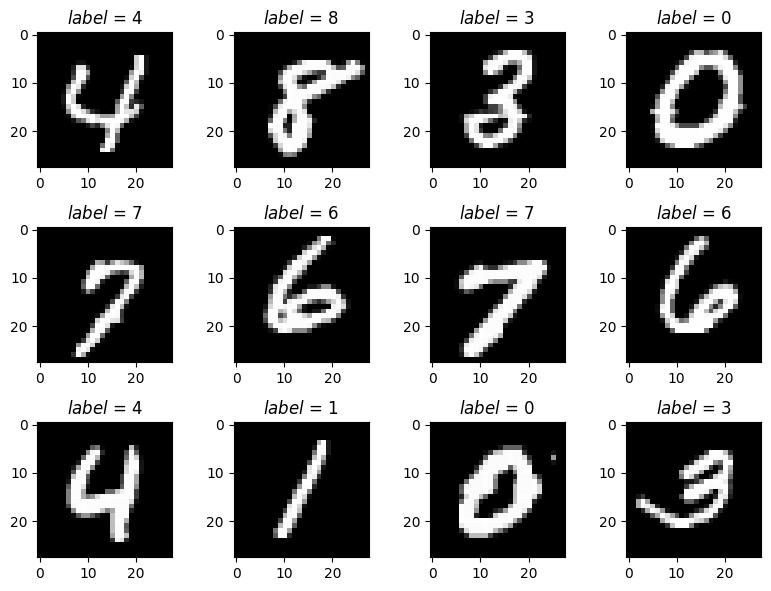

In [28]:
# Visualize the images using `matplotlib`.
plt.figure(figsize=(8, 6))
for i in range(12):
    plt.subplot(3,4,i+1)
    image, label = mnist_train[np.random.randint(0, n_train)]       # image: (1, 28, 28), label: integer
    image = image[0]        # index into the batch of one image to obtain the image itself: (28, 28)
    plt.imshow(image, cmap='gray')  # The axis is still there!
    plt.title(f"$label$ = {label}")
plt.tight_layout()

We now wrap the dataset by a data loader to load the dataset batch by batch for training process later. Moreover, we visualize the first batch of images in the training set.

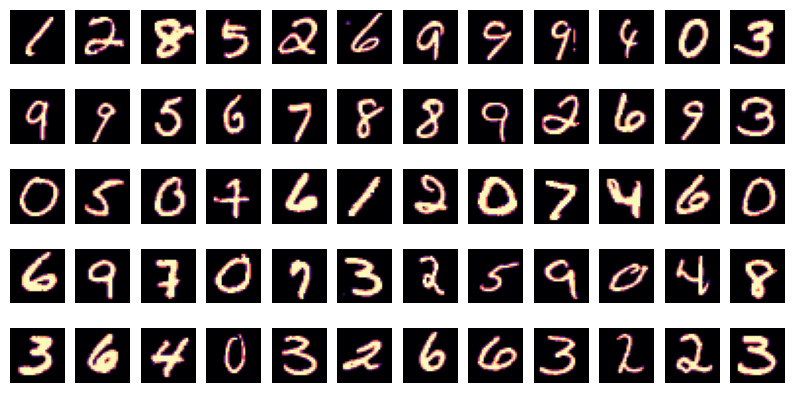

In [29]:
torch.manual_seed(42)       # for reproducibility purpose -- comment this line to see the effect of randomization
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=60, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=60, shuffle=True)

data_train_iter = iter(train_loader)
images, labels = next(data_train_iter)
images.shape, labels.shape

nrows, ncols = 5, 12
plt.figure(figsize=(10, 5.0))
for i in range(nrows * ncols):
    plt.subplot(nrows, ncols, i+1)
    # images[i,0] returns tensor of size (28, 28), using magma color map just for fun
    plt.imshow(images[i,0], cmap='magma')    # other color maps just for fun: "winter", "autumn", "plasma", ...
    plt.axis(False)     # Turn off the axis

### Build the multi-class logistic regression model and train the model

The model is defined in almost the same as the binary classification logistic regression model. The key difference is the number of outputs of the model. The model outputs a $10$-dimensional vector for one input example. Therefore, by feeding a batch of $N$ images into the model, the output has the shape $(N, 10)$.

In [30]:
class MNISTLogisticRegression(nn.Module):
    def __init__(self, n_classes):
        super().__init__()
        self.imsize = np.array([28, 28])
        self.n_classes = n_classes
        self.lin = nn.Linear(np.prod(self.imsize), self.n_classes)

    def forward(self, x):
        return self.lin(x)

In [31]:
imsize = train_set[0][0].shape

model_digits = MNISTLogisticRegression(n_classes=10)
print(f"The model: \n{model_digits}")

The model: 
MNISTLogisticRegression(
  (lin): Linear(in_features=784, out_features=10, bias=True)
)


In [32]:
# Learnable parameters in the model
pl = list(model_digits.parameters())
print(f"Parameters: \n{pl}")

Parameters: 
[Parameter containing:
tensor([[-0.0078,  0.0072, -0.0174,  ..., -0.0354,  0.0187,  0.0085],
        [-0.0182,  0.0344, -0.0162,  ...,  0.0017,  0.0045,  0.0133],
        [-0.0108, -0.0213,  0.0084,  ...,  0.0273, -0.0081,  0.0026],
        ...,
        [-0.0325,  0.0155,  0.0087,  ...,  0.0257,  0.0291,  0.0243],
        [-0.0006,  0.0088,  0.0018,  ..., -0.0147,  0.0053, -0.0194],
        [-0.0170,  0.0233, -0.0098,  ...,  0.0283, -0.0033,  0.0255]],
       requires_grad=True), Parameter containing:
tensor([ 0.0017,  0.0037, -0.0302, -0.0123,  0.0018,  0.0163,  0.0069, -0.0078,
         0.0002,  0.0307], requires_grad=True)]


For this problem, we use the `nn.CrossEntropyLoss()` to define the negative log entropy loss we explained above. Let us study this object carefully by testing whether it gives the same result as the loss function we studied.

In [33]:
images, labels = next(iter(train_loader))
print(f"images.shape = {images.shape}")
print(f"labels.shape = {labels.shape}")

images.shape = torch.Size([60, 1, 28, 28])
labels.shape = torch.Size([60])


This is where you see the shape of the output is $(N, 10)$ where $N$ is the batch size.

In [34]:
X_batch = images.squeeze().reshape((-1, 28*28))
y_batch = nn.functional.one_hot(labels, num_classes=10)
print(f"X_batch.shape = {X_batch.shape}")
print(f"y_batch.shape = {y_batch.shape}")

# Let us see one examples in labels and labels_tensor
print(f"labels[0] = {labels[0]}")
print(f"y_batch[0] = {y_batch[0]}")

X_batch.shape = torch.Size([60, 784])
y_batch.shape = torch.Size([60, 10])
labels[0] = 0
y_batch[0] = tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])


**Compute the loss function**

Let us now compute the loss function for one batch of images in different ways.
1. Use the analytical formula defined above
2. Use the object `CrossEntropyLoss` from the module `torch.nn`
3. Use the function `cross_entropy()` from the submodule `torch.nn.functional`

In [35]:
z = model_digits(X_batch)
print(f"Z.shape = {z.shape}")
p = nn.functional.softmax(z, dim=1)
print(f"p.shape = {p.shape}")

Z.shape = torch.Size([60, 10])
p.shape = torch.Size([60, 10])


Let us compute the probabilities from the outputs of the linear layer using the definition of softmax function and the function `nn.functional.softmax()`, then make the comparison of the results. Except the round-off errors, the results should be identical in theory.

In [36]:
py_eq = torch.exp(z) / torch.sum(torch.exp(z), dim=1, keepdim=True)
p = nn.functional.softmax(z, dim=1)
print(py_eq.shape, p.shape)
print(f"py_eq == p: {torch.allclose(py_eq, p)}")

torch.Size([60, 10]) torch.Size([60, 10])
py_eq == p: True


In [37]:
# However, the difference between them is noticeable. The reason is that
# the values of py are already quite small. So, it is harder to have the 
# difference at the machine error level 1e-16.
print(py_eq[0:5,0:5] - p[0:5, 0:5])
py_eq[0:2,0:2], p[0:2,0:2]

tensor([[-7.4506e-09, -2.2352e-08, -1.4901e-08, -1.4901e-08, -1.4901e-08],
        [-1.4901e-08,  0.0000e+00, -2.2352e-08, -1.4901e-08, -1.4901e-08],
        [-1.4901e-08, -2.2352e-08, -2.2352e-08, -1.4901e-08, -1.4901e-08],
        [-1.1176e-08, -1.4901e-08, -1.4901e-08, -2.2352e-08, -2.2352e-08],
        [ 7.4506e-09,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]],
       grad_fn=<SubBackward0>)


(tensor([[0.0702, 0.0999],
         [0.0905, 0.0840]], grad_fn=<SliceBackward0>),
 tensor([[0.0702, 0.0999],
         [0.0905, 0.0840]], grad_fn=<SliceBackward0>))

We now compute the loss function for the bacth of images by using different ways. You will see that the results are supposed to be identical.

In [38]:
# Natural and naive implementation
loss_eqn_a = -1/X_batch.shape[0] * torch.sum(torch.sum(y_batch * torch.log(p), dim=1), dim=0)
print(f"loss_eqn_a = {loss_eqn_a.item()}")

# Just a bit more complex way of thinking... but same formulation
loss_eqn_b = torch.mean(-torch.log(py_eq)[range(labels.shape[0]),labels])
print(f"loss_eqn_b = {loss_eqn_b.item()}")

print(f"loss_eqn_a - loss_eqn_b = {loss_eqn_a - loss_eqn_b}")

loss_eqn_a = 2.3315558433532715
loss_eqn_b = 2.3315558433532715
loss_eqn_a - loss_eqn_b = 0.0


It turns out that this can be done quite easily using the object `nn.CrossEntropyLoss` or the function `nn.CrossEntropyLoss()`

In [40]:
criterion = nn.CrossEntropyLoss(reduction='mean')
logits = model_digits(X_batch)
print(f"logits.shape = {logits.shape}")
print(f"labels.shape = {labels.shape}")

logits.shape = torch.Size([60, 10])
labels.shape = torch.Size([60])


In [42]:
loss_a = criterion(logits, labels)
print(f"loss_a = {loss_a}")

loss_b = F.cross_entropy(logits, labels)
print(f"loss_b = {loss_b}")
print(f"loss_a - loss_b = {loss_a - loss_b}")

loss_a = 2.3315558433532715
loss_b = 2.3315558433532715
loss_a - loss_b = 0.0


#### Train the model

We have seen that there are mulitple ways to compute the loss function. Below, we use `nn.torch.functional.cross_entropy()` to compute the loss function.

In [363]:
optimizer = torch.optim.Adam(model_digits.parameters(), lr=0.01)

In [371]:
# Iterate through training set minibatches
EPOCHS = 15
for epoch in tqdm(range(EPOCHS)):
    for images, labels in train_loader:
        # Zero out the gradients
        optimizer.zero_grad()
        # Forward pass
        x = images.view(-1, np.prod(model_digits.imsize))
        y = model_digits(x)
        
        # Backward pass
        loss = F.cross_entropy(y, labels)
        loss.backward()
        # Update learnable parameters
        optimizer.step()

correct = 0
total = len(mnist_test)
with torch.no_grad():
    # Iterate through test set minibatches
    for images, labels in tqdm(test_loader):
        # Forward pass
        x = images.view(-1, np.prod(model_digits.imsize))
        y = model_digits(x)
        prob = F.softmax(y, dim=1)
        y_pred = torch.argmax(prob, dim=1)
        correct += torch.sum((y_pred == labels).float())

print(f'Test accuracy: {correct / total}')

100%|██████████| 167/167 [00:01<00:00, 104.43it/s]

Test accuracy: 0.920199990272522


**Visualize the weight vectors and discussion**

Now, let us plot corresponding to each digit classification. As a weight vector $\mathbf{w}_j$ has dimension $28 \times 28 = 784$, we must reshape it into a tensor of size $28 \times 28$. Then, we visualize it as an image. 

You will see that the each vector $\mathbf{w}$ reveals the shape of the digit it tries to classify. The reason is rather simple. Assume that $\mathbf{x}$ is the image of digit $0$. Then, the model tries to learn to maximize the probability $P(y = 0|\mathbf{x})$ and reduce the the other probabilities. By definition of the softmax functions, the model tries to increase the value $\mathbf{w}_{0} \cdot \mathbf{x} + b_0$ where $\mathbf{w}_0$ and $b_0$ are the parameters corresponding to classifying the digit $0$ from the rest. So, the values of $\mathbf{w}$ should be quite large in the area the pixel of the image $0$ are large to resonate the value of the dot product. These values make the pixels revealing the digit $0$ stand out in the image as compared to the rest and thus we can see it quite clear. This kind of argument applies to the prediction of other digits. You can see the number $1$ and the number $3$, and the number $8$ quite clear in the image visualization of their corresponding weight vectors.

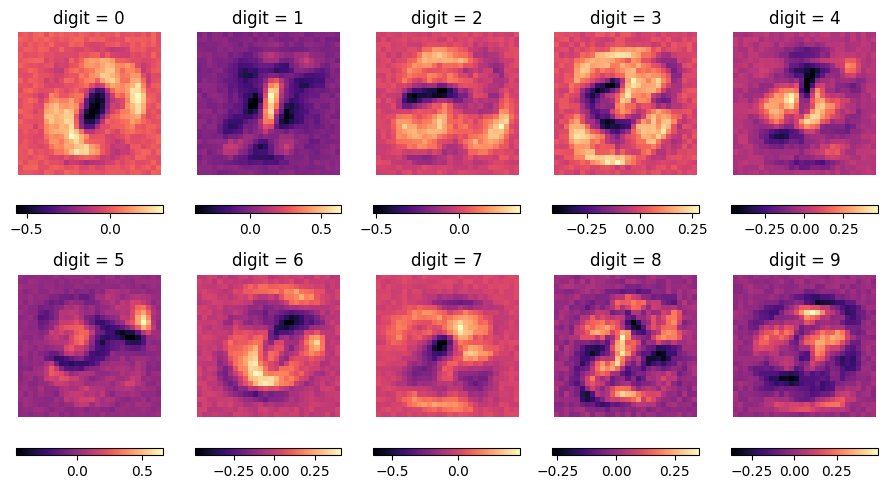

In [390]:
# Get weights
plt.figure(figsize=(9, 5))
W = model_digits.lin.weight
for digit in range(10):
    plt.subplot(2, 5, digit+1)
    plt.imshow(W[digit,:].detach().view(28,28), cmap='magma')
    plt.title(f"digit = {digit}")
    plt.axis('off')
    plt.colorbar(location='bottom')
plt.tight_layout()